In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

import wrangle 
import env

alpha = .05


### Acquire Zillow data using functions made during wrangle

In [2]:
df = wrangle.get_zillow_data()

Reading from csv file...


### Clean data using wrangle function

In [3]:
df = wrangle.wrangle_zillow(df)

In [4]:
df.head()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcounty,regionidzip,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,propertylandusedesc,county
1,17052889,1.0,2.0,1465.0,6111.0,34449266.0,-119281531.0,12647.0,2061.0,97099.0,1967.0,88000.0,464000.0,376000.0,5672.48,0.055619,2017-01-01,Single Family Residential,Ventura
2,14186244,2.0,3.0,1243.0,6059.0,33886168.0,-117823170.0,8432.0,1286.0,97078.0,1962.0,85289.0,564778.0,479489.0,6488.30,0.005383,2017-01-01,Single Family Residential,Orange
3,12177905,3.0,4.0,2376.0,6037.0,34245180.0,-118240722.0,13038.0,3101.0,96330.0,1970.0,108918.0,145143.0,36225.0,1777.51,-0.103410,2017-01-01,Single Family Residential,Los_Angeles
4,10887214,3.0,3.0,1312.0,6037.0,34185120.0,-118414640.0,278581.0,3101.0,96451.0,1964.0,73681.0,119407.0,45726.0,1533.89,0.006940,2017-01-01,Condominium,Los_Angeles
5,17143294,2.0,3.0,1492.0,6111.0,34230044.0,-118993991.0,903.0,2061.0,97091.0,1982.0,198640.0,331064.0,132424.0,3508.10,-0.020526,2017-01-01,Condominium,Ventura


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42647 entries, 1 to 77572
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      42647 non-null  int64  
 1   bathroomcnt                   42647 non-null  float64
 2   bedroomcnt                    42647 non-null  float64
 3   calculatedfinishedsquarefeet  42647 non-null  float64
 4   fips                          42647 non-null  float64
 5   latitude                      42647 non-null  float64
 6   longitude                     42647 non-null  float64
 7   lotsizesquarefeet             42647 non-null  float64
 8   regionidcounty                42647 non-null  float64
 9   regionidzip                   42647 non-null  float64
 10  yearbuilt                     42647 non-null  float64
 11  structuretaxvaluedollarcnt    42647 non-null  float64
 12  taxvaluedollarcnt             42647 non-null  float64
 13  l

### Split Data using function

In [6]:
test, validate, train = wrangle.split_data(df)

Dataframe has been split: 
Train: (23881, 19)
Validate: (10236, 19)
Test: (8530, 19)


In [101]:
def min_max_scaler(train, valid, test):
    '''
    Uses the train & test datasets created by the split_data function
    This is a linear transformation. Values will lie between 0 and 1
    '''
    num_vars = list(train.select_dtypes('number').columns)
    scaler = MinMaxScaler(copy=True, feature_range=(0,1))
    train[num_vars] = scaler.fit_transform(train[num_vars])
    valid[num_vars] = scaler.transform(valid[num_vars])
    test[num_vars] = scaler.transform(test[num_vars])
    return scaler, train, valid, test

In [102]:
mm_scaler, train_mm, validate_mm, test_mm = min_max_scaler(train, validate, test)

In [7]:
train.head()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcounty,regionidzip,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,propertylandusedesc,county
14597,11742813,1.0,2.0,784.0,6037.0,34043584.0,-118337174.0,3153.0,3101.0,96000.0,1923.0,65700.0,328500.0,262800.0,4040.36,-0.019698,2017-03-05,Single Family Residential,Los_Angeles
73243,13058074,3.0,4.0,2494.0,6037.0,33999063.0,-117791279.0,9909.0,3101.0,96505.0,1986.0,308030.0,463496.0,155466.0,5751.35,0.005565,2017-09-01,Single Family Residential,Los_Angeles
40367,10918731,5.0,4.0,5584.0,6037.0,34134274.0,-118422224.0,5379.0,3101.0,96424.0,1991.0,291345.0,729715.0,438370.0,9073.02,0.097719,2017-05-26,Single Family Residential,Los_Angeles
60899,11064726,2.0,3.0,1254.0,6037.0,34269823.0,-118506765.0,7139.0,3101.0,96370.0,1953.0,153923.0,364413.0,210490.0,4550.28,-0.036961,2017-07-26,Single Family Residential,Los_Angeles
7842,11276254,2.0,4.0,2162.0,6037.0,34715131.0,-118159767.0,5282.0,3101.0,97317.0,2001.0,124263.0,165684.0,41421.0,2909.02,-0.004901,2017-02-03,Single Family Residential,Los_Angeles


In [8]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
parcelid,8530.0,1.265908e+07,1.894699e+06,1.071194e+07,1.120774e+07,1.207431e+07,1.307693e+07,1.730076e+07
bathroomcnt,8530.0,2.315416e+00,8.688215e-01,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,7.000000e+00
bedroomcnt,8530.0,3.082063e+00,9.898391e-01,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,7.000000e+00
calculatedfinishedsquarefeet,8530.0,1.785064e+03,8.065503e+02,3.600000e+02,1.220000e+03,1.585000e+03,2.168000e+03,5.960000e+03
fips,8530.0,6.048021e+03,2.322165e+01,6.037000e+03,6.037000e+03,6.037000e+03,6.037000e+03,6.111000e+03
latitude,8530.0,3.409496e+07,2.512970e+05,3.335420e+07,3.391183e+07,3.411964e+07,3.422444e+07,3.475604e+07
longitude,8530.0,-1.183001e+08,3.491474e+05,-1.193717e+08,-1.184810e+08,-1.183000e+08,-1.180790e+08,-1.175643e+08
lotsizesquarefeet,8530.0,2.716757e+04,5.906687e+04,4.350000e+02,6.126250e+03,7.756000e+03,1.538550e+04,4.954290e+05
regionidcounty,8530.0,2.742219e+03,6.594868e+02,1.286000e+03,3.101000e+03,3.101000e+03,3.101000e+03,3.101000e+03
regionidzip,8530.0,9.650586e+04,4.078699e+02,9.598200e+04,9.622100e+04,9.637400e+04,9.697100e+04,9.734400e+04


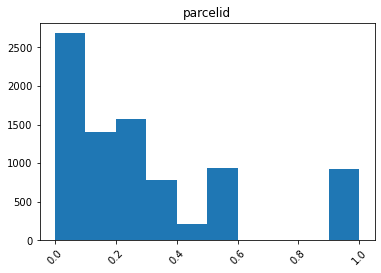

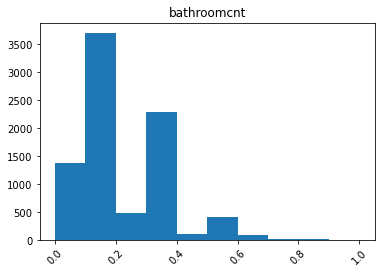

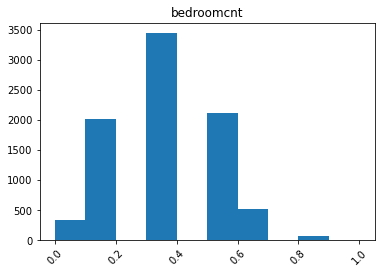

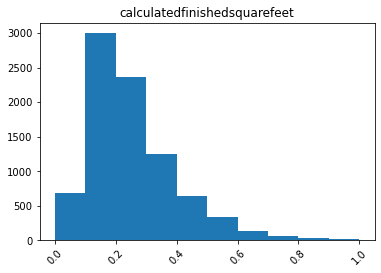

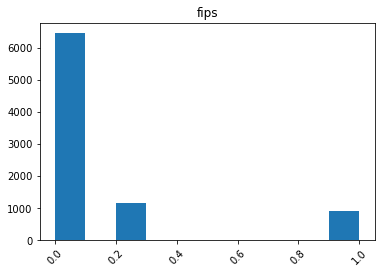

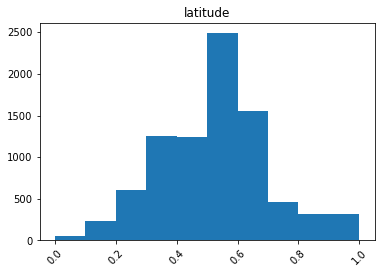

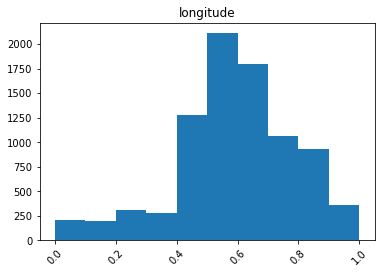

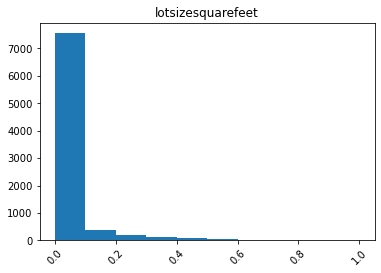

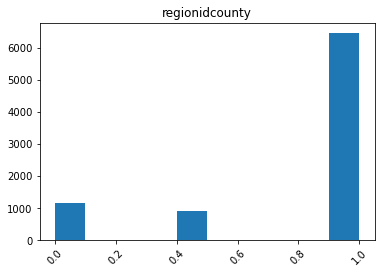

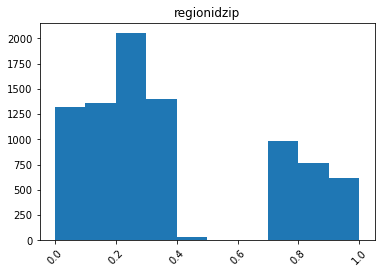

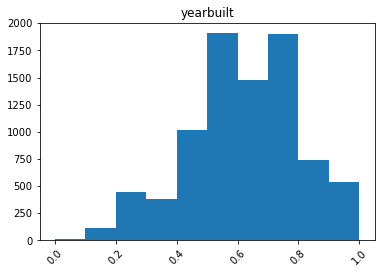

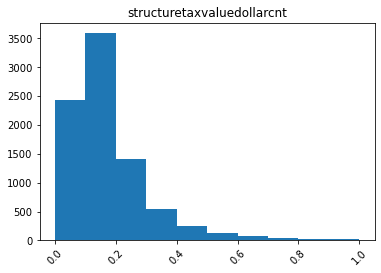

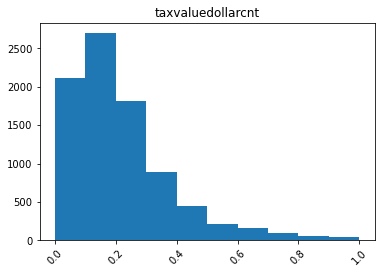

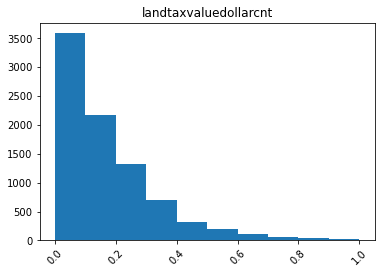

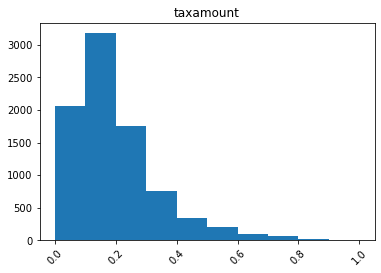

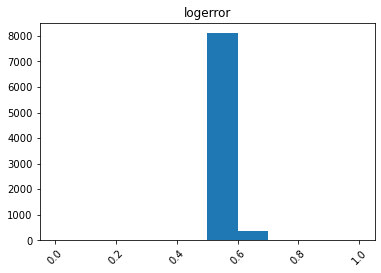

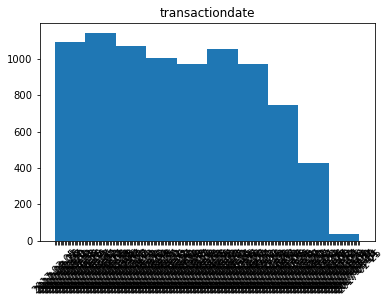

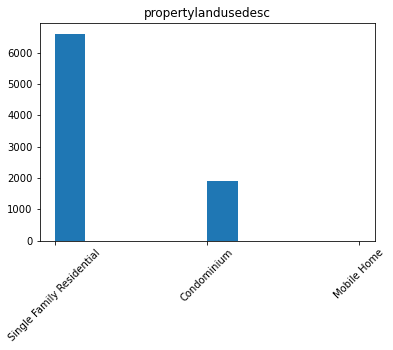

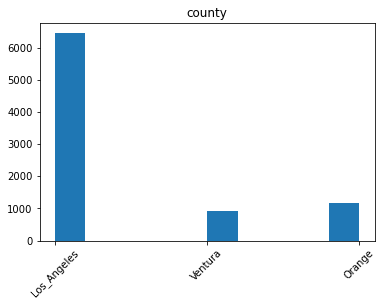

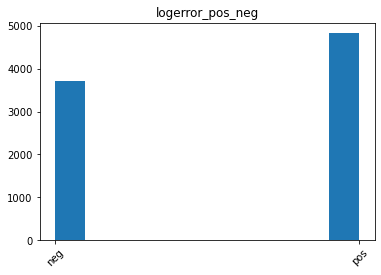

In [103]:
for col in train_mm.columns:
    plt.hist(train_mm[col])
    plt.title(col)
    plt.xticks(rotation=45)
    plt.show()

In [10]:
obj_cols = train.columns[[train[col].dtype == 'O'for col in train.columns]]
for col in obj_cols:
    print(col.upper())
    print('Count:')
    print(train[col].value_counts())
    print('--------------------------')
    print('\n')

TRANSACTIONDATE
Count:
2017-06-30    123
2017-05-26    104
2017-07-28    103
2017-04-28    101
2017-05-31     97
             ... 
2017-07-22      1
2017-09-17      1
2017-04-08      1
2017-05-28      1
2017-02-25      1
Name: transactiondate, Length: 217, dtype: int64
--------------------------


PROPERTYLANDUSEDESC
Count:
Single Family Residential    6614
Condominium                  1915
Mobile Home                     1
Name: propertylandusedesc, dtype: int64
--------------------------


COUNTY
Count:
Los_Angeles    6448
Orange         1155
Ventura         927
Name: county, dtype: int64
--------------------------




In [42]:
train['logerror_pos_neg'] = np.where(train.logerror < 0,'neg','pos')

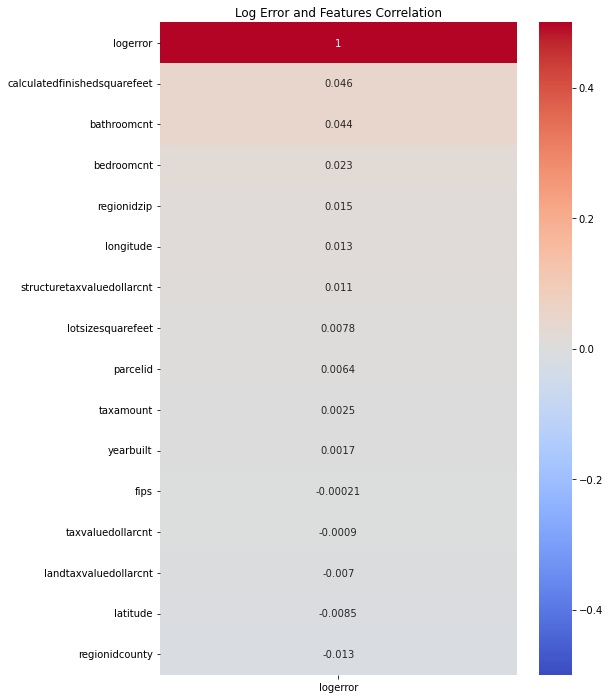

In [104]:
plt.figure(figsize=(8,12))
log_htmap = sns.heatmap(train_mm.corr()[['logerror']].sort_values(by='logerror', ascending=False), cmap = 'coolwarm', vmin=-.5, vmax=.5, annot=True)
log_htmap.set_title('Log Error and Features Correlation')
plt.show()

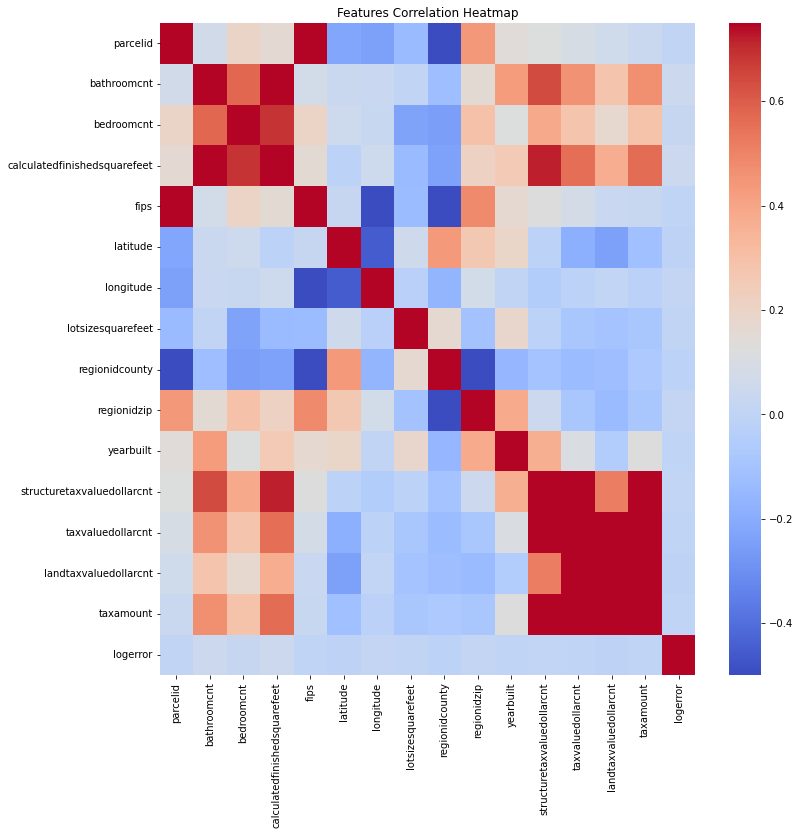

In [44]:
plt.figure(figsize=(12,12))
htmap = sns.heatmap(train.corr(), cmap = 'coolwarm', vmin=-.5, vmax=.75)
htmap.set_title('Features Correlation Heatmap')
plt.show()

###  Takeaways:
- Logerror has a very low correlation on the heatmap
- Let's explore at the variables o mentioned on our questions

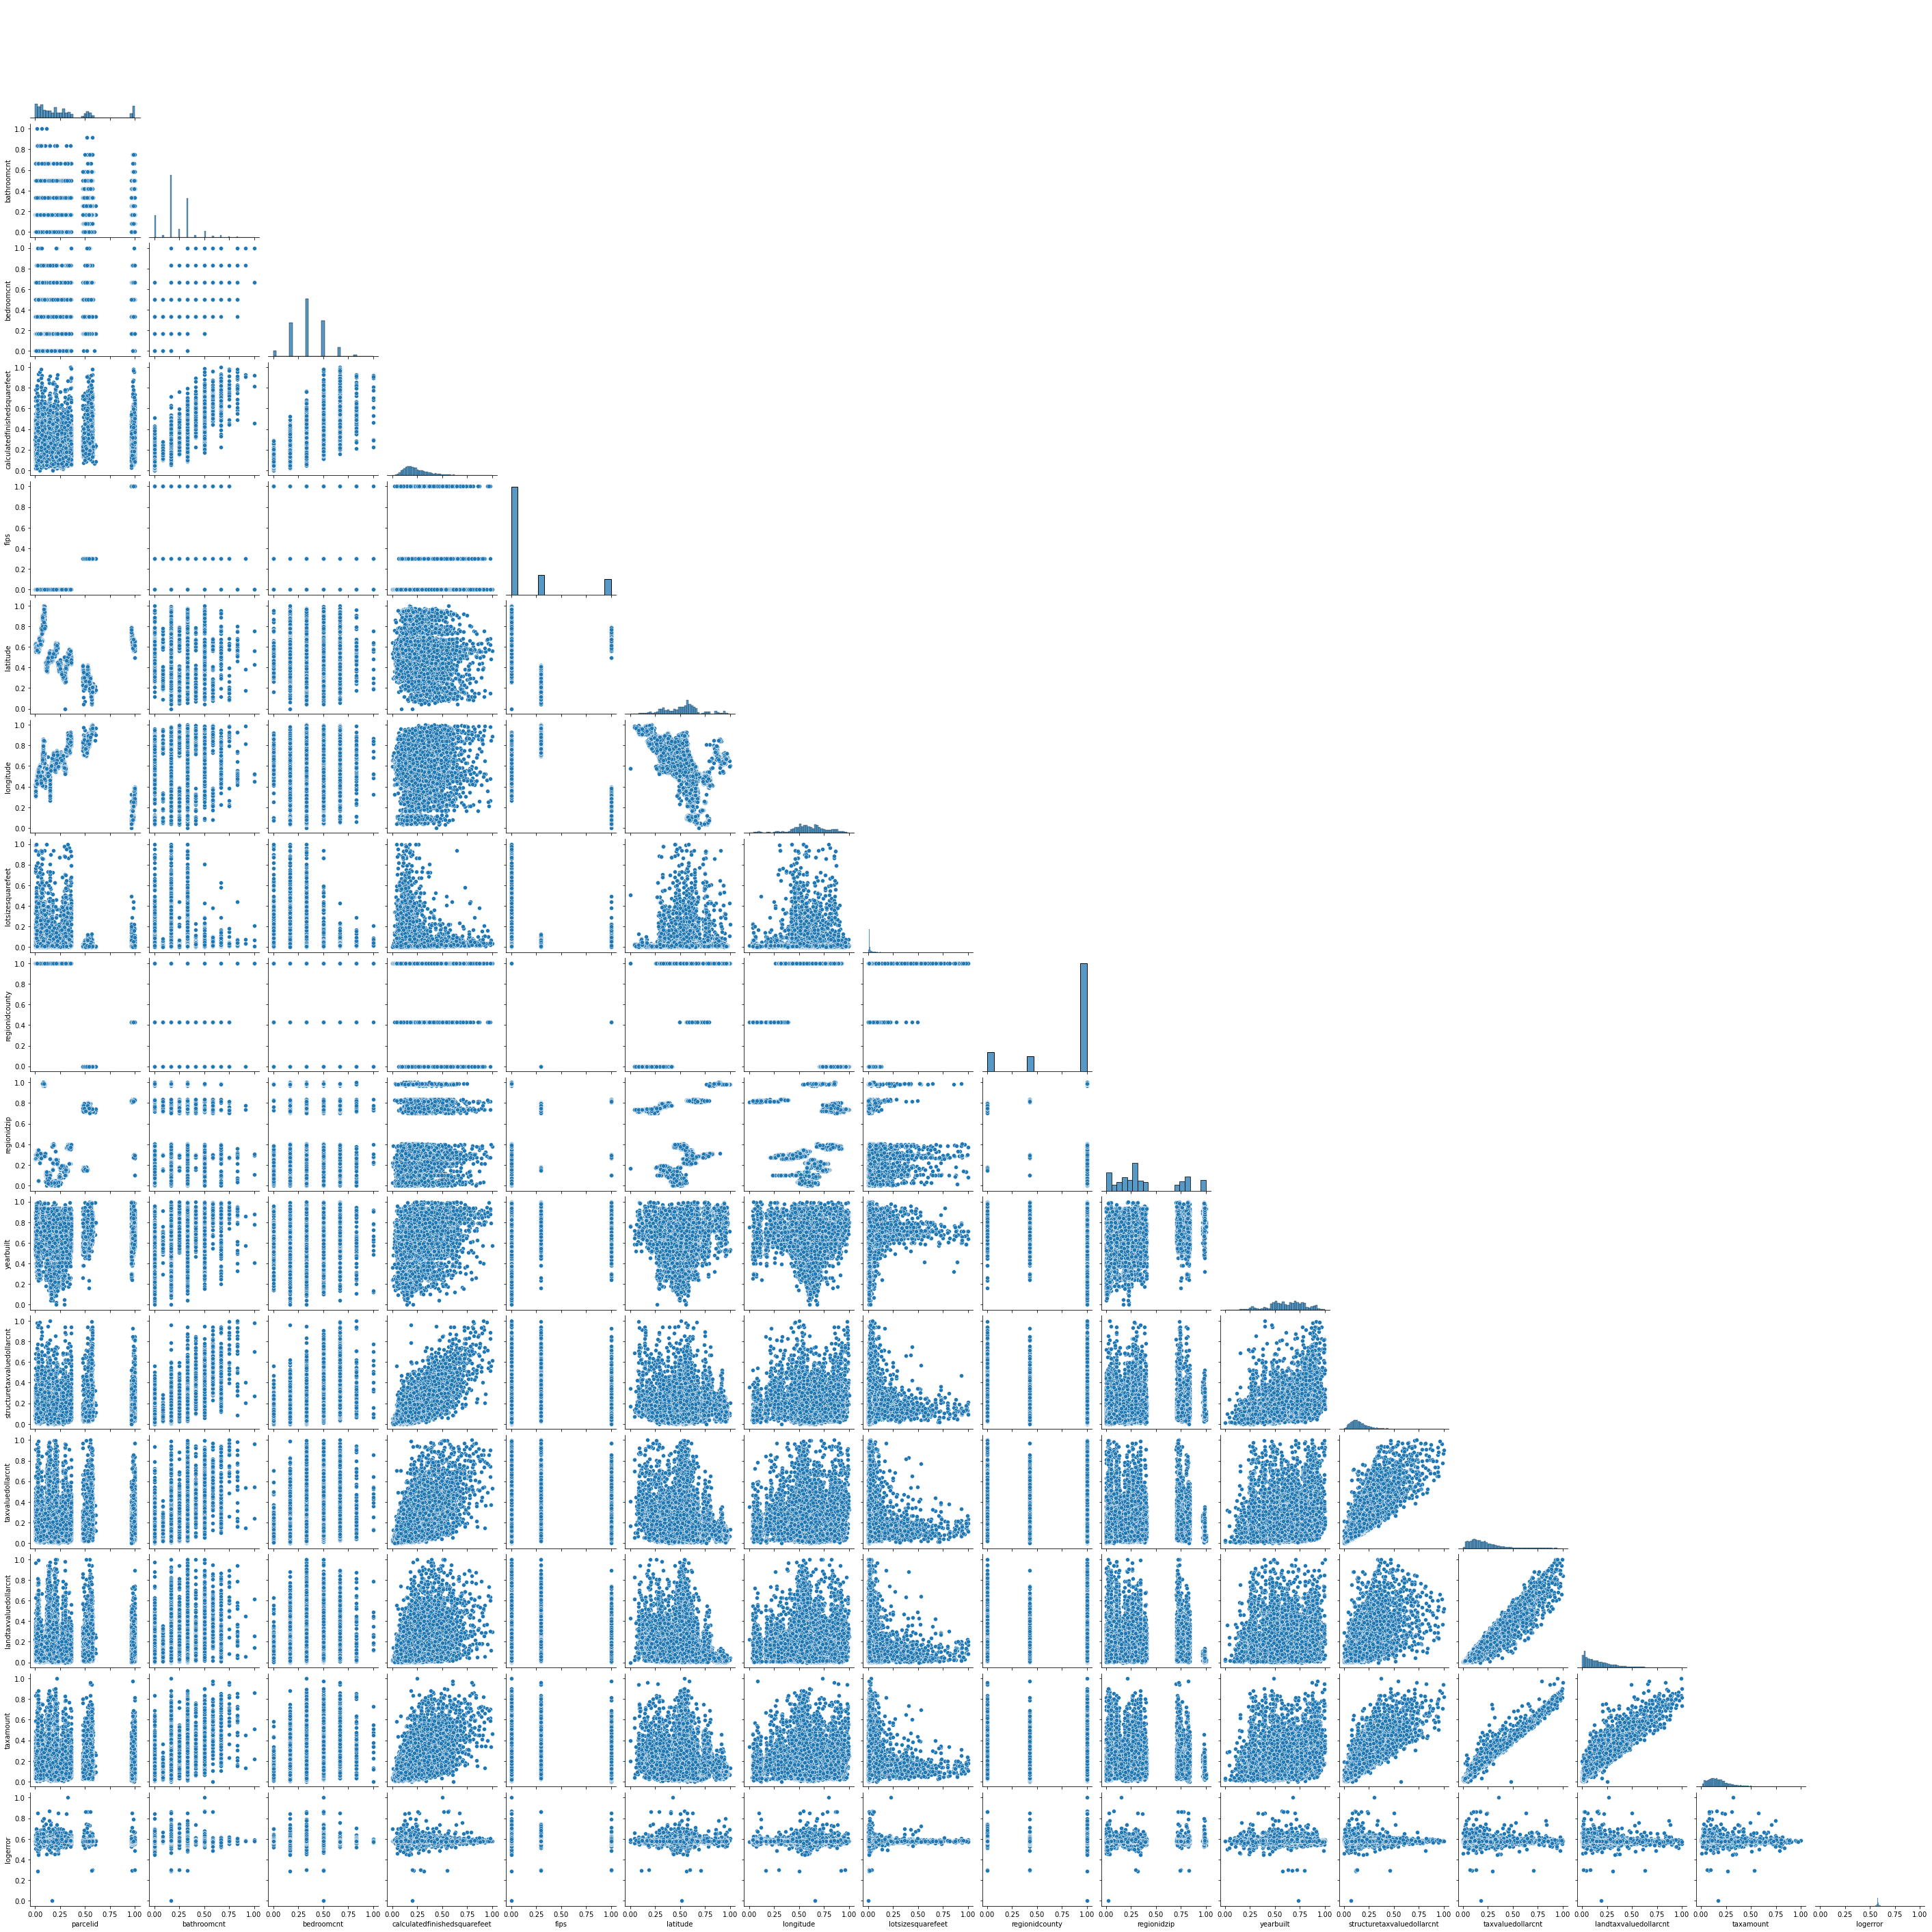

In [106]:
sns.pairplot(data=train_mm,corner=True)

## Initial questions:

### Question 1 

Is there a relationship between Log Error and Zip Code?

Relationship between Log Error and Zip Code


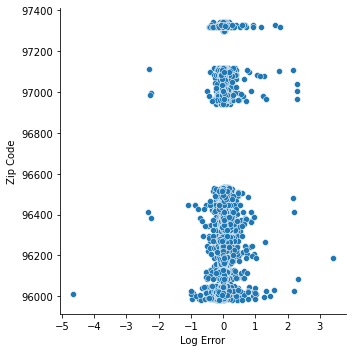

In [97]:
print('Relationship between Log Error and Zip Code')
sns.relplot(y='regionidzip', x='logerror', data=train)
plt.xlabel('Log Error')
plt.ylabel('Zip Code')
plt.show()

HO: There is no relation between Zip Code and Log Error
<p>
H⍺: There is a relation between Zip Code and Log Error

In [15]:
observed = pd.crosstab(train.logerror, train.regionidzip)

chi2, p, degf, expected = stats.chi2_contingency(observed)
print('Observed\n:')
print(observed.values)
print('------------------------\nExpected: \n')
print(expected.astype(int))
print('------------------------\n')
print(f'chi2 = {chi2:.2f}')
print(f'p value: {p:.4f}')
print(f'degrees of freedom: {degf}')
if (p < alpha):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

Observed
:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
------------------------
Expected: 

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
------------------------

chi2 = 3153287.21
p value: 0.3618
degrees of freedom: 3152400
We fail to reject the null hypothesis


### Answer:
We cannot reject the null hypothesis. We will continue to assert there is no significant relationship between Zip Code and Log Error

### Question 2 
Is there a relationship between Log Error and Square Footage?

Relationship between Log Error and Square Footage


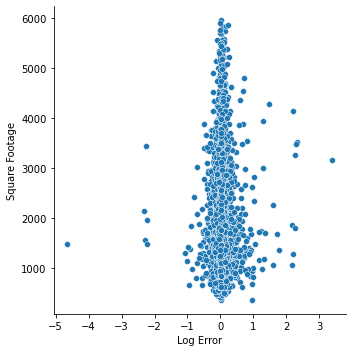

In [93]:
print('Relationship between Log Error and Square Footage')
sns.relplot(y='calculatedfinishedsquarefeet', x='logerror', data=train)
plt.xlabel('Log Error')
plt.ylabel('Square Footage')
plt.show()

HO: There is no relation between Square Footage and Log Error
<p>
H⍺: There is a relation between Square Footage and Log Error

In [17]:
observed = pd.crosstab(train.logerror, train.calculatedfinishedsquarefeet)

chi2, p, degf, expected = stats.chi2_contingency(observed)
print('Observed\n:')
print(observed.values)
print('------------------------\nExpected: \n')
print(expected.astype(int))
print('------------------------\n')
print(f'chi2 = {chi2:.2f}')
print(f'p value: {p:.4f}')
print(f'degrees of freedom: {degf}')
if (p < alpha):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

Observed
:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
------------------------
Expected: 

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
------------------------

chi2 = 23024951.88
p value: 0.0335
degrees of freedom: 23012520
We reject the null hypothesis


### Answer:
We cannot reject the null hypothesis. We will continue to assert there is no significant relationship between Square Footage and Log Error

### Question 3 
Is there a relationship between Log Error and Tax Value?

Relationship between Log Error and Tax Value


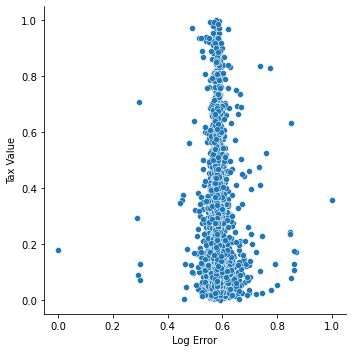

In [108]:
print('Relationship between Log Error and Tax Value')
sns.relplot(y='taxvaluedollarcnt', x='logerror', data=train)
plt.xlabel('Log Error')
plt.ylabel('Tax Value')
plt.show()

HO: There is no relation between Tax Value and Log Error
<p>
H⍺: There is a relation between Tax Value and Log Error

In [19]:
observed = pd.crosstab(train.logerror, train.taxvaluedollarcnt)

chi2, p, degf, expected = stats.chi2_contingency(observed)
print('Observed\n:')
print(observed.values)
print('------------------------\nExpected: \n')
print(expected.astype(int))
print('------------------------\n')
print(f'chi2 = {chi2:.2f}')
print(f'p value: {p:.4f}')
print(f'degrees of freedom: {degf}')
if (p < alpha):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

Observed
:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
------------------------
Expected: 

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
------------------------

chi2 = 64202466.67
p value: 0.1296
degrees of freedom: 64189680
We fail to reject the null hypothesis


### Answer:
We cannot reject the null hypothesis. We will continue to assert there is no significant relationship between Tax Value and Log Error

### Question 4 
Is there a relationship between Log Error and Latitude?

Relationship between Log Error and Latitude


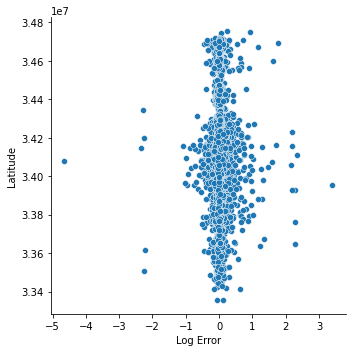

In [50]:
print('Relationship between Log Error and Latitude')
sns.relplot(y='latitude', x='logerror', data=train)
plt.xlabel('Log Error')
plt.ylabel('Latitude')
plt.show()

HO: There is no relation between Latitude and Log Error
<p>
H⍺: There is a relation between Latitude and Log Error

In [21]:
observed = pd.crosstab(train.logerror, train.latitude)

chi2, p, degf, expected = stats.chi2_contingency(observed)
print('Observed\n:')
print(observed.values)
print('------------------------\nExpected: \n')
print(expected.astype(int))
print('------------------------\n')
print(f'chi2 = {chi2:.2f}')
print(f'p value: {p:.4f}')
print(f'degrees of freedom: {degf}')
if (p < alpha):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

Observed
:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
------------------------
Expected: 

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
------------------------

chi2 = 67973437.50
p value: 0.2101
degrees of freedom: 67964040
We fail to reject the null hypothesis


### Answer:
We cannot reject the null hypothesis. We will continue to assert there is no significant relationship between Latitude and Log Error

Relationship between Log Error and Latitude


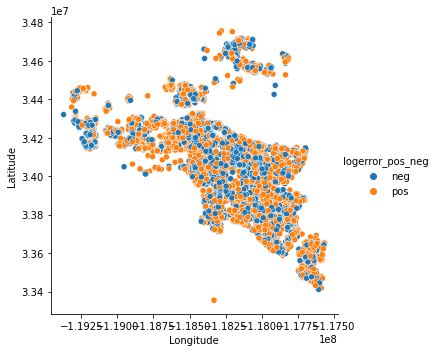

In [96]:
print('Relationship between Log Error and Latitude')
sns.relplot(y='latitude', x='longitude', hue ='logerror_pos_neg', palette="tab10",data=train)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()